In [171]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from matplotlib_venn import venn2, venn2_circles

### 1. Summary of the research request

In February 2021, the chief of the Stanford School of Medicine (SoM) Gastrointestinal unit requested a quarterly report of publications for 60 researchers (note: 63 names were provided but 3 were duplicates). The DLSS section of the Research Intelligence working group took this as an opportunity to test some methods and compare Dimensions to Profiles. Peter Magniafico ran a report from Profiles and Jacob Hill ran a report from Dimensions. 

### 2. Overview

For the Dimensions output, three csv files are provided: 'dimensions_report_som_gi.csv', 'dimensions_report_no_dupes_som_gi.csv', and 'dimensions_report_all_som_gi.csv'. The first is a report of all publications. In cases where researchers from SOM GI co-authored a publication, the publication will be recorded once for each author. The second has duplications removed so each publication is recorded only once; it can be used to track total publications for the department. The third file has many duplications (each publication can appear the_number_of_som_gi_researchers x the_number_of_search_strategies times). It can be used to evaluate the various search strategies used: there were a total of four strategies, each is described and anylized below. 

For the Profiles output, two csv files are provided: 'profiles_report_with_orcid_som_gi.csv' and 'profiles_report_som_gi.csv'. The first has publications returned from Profiles via ORCID search. The second has publicaitons returned via cap_profile id search (Peter is this accurate)?

Below is an an analysis of the four search strategies used in the Dimensions search (sections 4-11), a comparison of the results from Profiles with that of Dimensions (section 12), and a summary (section 13). 

### 3. Analysis helper functions

In [172]:
def plot_venn(array_one, array_two, msg_one, msg_two, variable_label, second_label='Other'):
    set1 = set(array_one)
    set2 = set(array_two)

    print("{}: {}".format(msg_one, len(set1)))
    print("{}: {}".format(msg_two, len(set2)))
    print("Total: {}".format(len(set1.difference(set2)) + len(set2.difference(set1)) + len(set1.intersection(set2))))

    plt.figure(figsize=(6,4))
    v = venn2(subsets = (len(set1.difference(set2)),
                         len(set2.difference(set1)),
                         len(set1.intersection(set2))), set_labels = (variable_label, second_label))
           
    c = venn2_circles(subsets = (len(set1.difference(set2)),
                                 len(set2.difference(set1)),
                                 len(set1.intersection(set2))), linestyle='solid')

    plt.show()

def printmd(string):
    display(Markdown(string))

### 4. Searching by name string and GRID (strategy 1)

In [173]:
# Load the dimensions data
som_dataset = pd.read_csv('output/dimensions_report_all_som_gi.csv',delimiter=',')

The initial search strategy uses a name string (e.g. 'Afrin Kamal') and a list of GRID ids fetched from an approximate match of the institution name string; this is the recommended approach to search for institutions in Dimensions.

### 5. Searching by Dimensions researcher ID and GRID (strategy 2)

In the same way the institution name string can be used to fectch multiple GIRD ids, the researcher name string can be used to fetch 0 or multiple researcher ids; these are ids assignment by Dimensions and used to disambiguate researchers.

### 6. Searching by ORCID (strategy 3)

It is also possible to search for publications with a matching ORCID.

### 7. Searching by Dimensions researcher ID only (strategy 4)

Finally it is possible to use the name string to fetch a list of Dimensions researcher ids (as done above) without incorporating the institution field. This approach has the advantage of returing results when alternate instituitons have not been fully added to the input data or in publications where Dimensions has left this field blank. In cases where the researcher name is uncommon, it may be a useful addition to the strategies above. In cases where the researcher name is common, this approach has the potential to overwhelm the results with a significant percentage of false positives. 

### 8. Searching by name string and GRID (strategy 1): Results

Name string & GRID: 2054
Other (Researcher id & GRID, or ORCID): 2772
Total: 3171


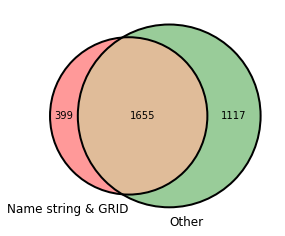

In [174]:
test = som_dataset[(som_dataset['search_strategy'] == 'Name string & GRID')]
other = som_dataset[(som_dataset['search_strategy'] == 'ORCID') | (som_dataset['search_strategy'] == 'Reasearcher id & GRID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Name string & GRID', 'Other (Researcher id & GRID, or ORCID)', 'Name string & GRID')

For compasison we can also plot the Venn diagram with results from searching only the researcher id included.

Name string & GRID: 2054
Other (Researcher id & GRID, ORCID, or researcher id alone): 5173
Total: 5572


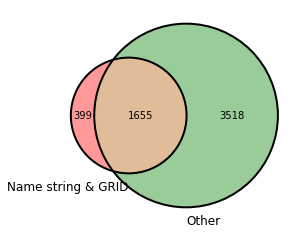

In [175]:
test = som_dataset[(som_dataset['search_strategy'] == 'Name string & GRID')]
other = som_dataset[(som_dataset['search_strategy'] != 'Name string & GRID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Name string & GRID', 'Other (Researcher id & GRID, ORCID, or researcher id alone)', 'Name string & GRID')

### 9. Searching by Dimensions research ID and GRID (strategy 2): Results

Researcher id & GRID: 1812
Other (Name string & GRID, or ORCID): 3119
Total: 3171


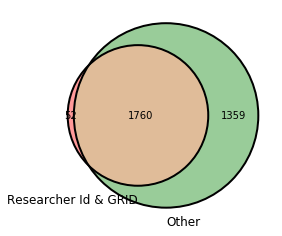

In [176]:
test = som_dataset[(som_dataset['search_strategy'] == 'Reasearcher id & GRID')]
other = som_dataset[(som_dataset['search_strategy'] == 'ORCID') | (som_dataset['search_strategy'] == 'Name string & GRID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Researcher id & GRID', 'Other (Name string & GRID, or ORCID)', 'Researcher Id & GRID')

Searching by researcher id seems to have a small effect on the results; it returned 52 publications that were not returned by the other approaches. Again we can compare this with the results of the research id alone (strategy 4) included. 

Researcher id & GRID: 1812
Other (Name string & GRID, ORCID, or researcher id alone): 5572
Total: 5572


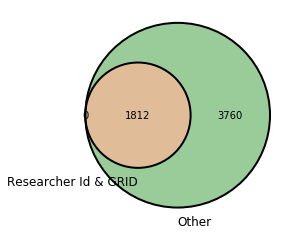

In [177]:
test = som_dataset[(som_dataset['search_strategy'] == 'Reasearcher id & GRID')]
other = som_dataset[(som_dataset['search_strategy'] != 'Reasearcher id & GRID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Researcher id & GRID', 'Other (Name string & GRID, ORCID, or researcher id alone)', 'Researcher Id & GRID')

As expected the set of publications returned from searching the research id and GRID (strategy 2) is completely subsummed withing the set of searching the researcher id alone (strategy 4).

### 10. Searching by ORCID (strategy 3): Results

One question that we will want to track over time is ORCID coverage. It is expected that ORCID will, in time, eliminate name ambiguity problems. The current state of ORCID coverage is unclear. To get a sense of ORCID coverage in Dimensions we can plot a Venn diagram of two sets of returned publications: those retrieved from an ORCID query, and those retreived from either a name string search and a GRID or a research id search and a GRID. Results returned from a research id alone are excluded because of the high likelihood of false positives. 

Orcid: 1914
Other (Name string & GRID, or ORCID): 2215
Total: 3171


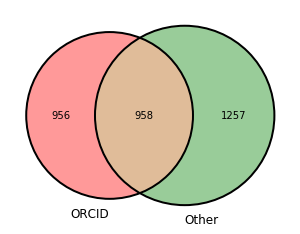

In [178]:
test = som_dataset[(som_dataset['search_strategy'] == 'ORCID')]
other = som_dataset[(som_dataset['search_strategy'] == 'Name string & GRID') | (som_dataset['search_strategy'] == 'Reasearcher id & GRID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Orcid', 'Other (Name string & GRID, or ORCID)', 'ORCID')

For compasison we can also plot the Venn diagram with results from searching only the researcher id included.

Orcid: 1914
Other (Name string & GRID, ORCID, or researcher id alone): 5345
Total: 5572


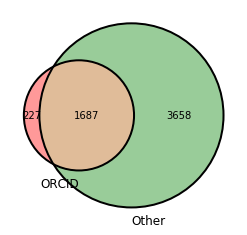

In [179]:
test = som_dataset[(som_dataset['search_strategy'] == 'ORCID')]
other = som_dataset[(som_dataset['search_strategy'] != 'ORCID')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Orcid', 'Other (Name string & GRID, ORCID, or researcher id alone)', 'ORCID')

ORCID is clearly not sufficiently covered in Dimensions to use it as our sole search strategy, however, it is clearly useful as an additive approach. It was able to return unique results beyond what the other three strategies could return. ~4% of the publications could only be returned via an ORCID query. 

By comparing the two Venn diagrams we can also see that searching by researcher ID alone added 2,401 results that were not returned by any other approach. The assumption we are opterating on is that these results will include many false positives because of the likelihood of many researchers (in the whole world) having the same name. It is impossible to know who noisy the data will be without a manual inspection but we can assume that at least 729 of these 2,401 results (956-227: the intersection between the ORCID and research id only results) are correct.

Future inquiries could attempt to understand the current limitations of ORCID by looking at coverage over time (Are recent publicaitons better covered than others?), by researcher (Are some researchers well covered while others are not covered at all?), or by field (Are some research areas better represented than others? If so, which ones?) A better understanding of the current coverage limitations could help us determine campus wide strategies to improve ORCID coverage.

In [180]:
researchers = som_dataset.display_name.unique()
researchers_list = []
orcid_counts = []
percent_of_coverage = []
orcid_pub_years = []
all_pub_years = []
for r in researchers:
    orcid_pubs = som_dataset[(som_dataset['display_name'] == r) & (som_dataset['search_strategy'] == 'ORCID')]
    total_pubs = som_dataset[(som_dataset['display_name'] == r)]
    researchers_list.append(r)
    orcid_counts.append(orcid_pubs.shape[0])
    percent_of_coverage.append(round((orcid_pubs.shape[0]/total_pubs.shape[0]) * 100, 2))
    for y in orcid_pubs['pub_year']:
        orcid_pub_years.append(int(y))
    for y in total_pubs['pub_year']:
        if math.isnan(y):
            pass
        else:
            all_pub_years.append(int(y))
    printmd("**{}:** {} of {} publications".format(r, orcid_pubs.shape[0], total_pubs.shape[0]))

**Aida Habtezion:** 0 of 574 publications

**Aijaz Ahmed:** 370 of 4433 publications

**Alexander Podboy:** 38 of 187 publications

**Allison Kwong:** 44 of 126 publications

**Andrew Li:** 50 of 494 publications

**Andrew Ofosu:** 0 of 285 publications

**Anso Lowe:** 0 of 147 publications

**Aparna Goel:** 39 of 2867 publications

**Branden Tarlow:** 20 of 104 publications

**David Limsui:** 0 of 45 publications

**Ed Pham:** 0 of 143 publications

**Edith Ho:** 0 of 126 publications

**Elizabeth Streett:** 0 of 17 publications

**George Triadofilopoulos:** 546 of 1604 publications

**Grant Barber:** 0 of 3 publications

**Houssam Halawi:** 0 of 38 publications

**Jeffrey Glenn:** 0 of 1076 publications

**Jennifer Pan:** 19 of 23 publications

**John Clarke:** 0 of 509 publications

**John Gubatan:** 32 of 80 publications

**Joo Ha Hwang:** 196 of 196 publications

**Kian Keyashian:** 0 of 60 publications

**Leila Neshatian:** 40 of 40 publications

**Linda Nguyen:** 0 of 6051 publications

**Mike Wei:** 0 of 1132 publications

**Mindie Nguyen:** 0 of 20237 publications

**Monique Barakat:** 0 of 189 publications

**Natalie Torok:** 0 of 1864 publications

**Nielsen Fernandez-Becker:** 0 of 91 publications

**Paul Kwo:** 0 of 807 publications

**Radhika Kumari:** 0 of 88 publications

**Ramsey Cheung:** 11 of 11 publications

**Ray Kim:** 341 of 17100 publications

**Renu Dhanasekaran:** 141 of 5530 publications

**Robert J Huang:** 57 of 81 publications

**Samer Eldika:** 0 of 72 publications

**Sean Spencer:** 25 of 57 publications

**Shai Friedland:** 0 of 495 publications

**Sid Sinha:** 30 of 30 publications

**Stephen Rogalla:** 0 of 58 publications

**Subhas Banerjee:** 0 of 9147 publications

**Sunny Singh:** 0 of 277 publications

**Tami Daugherty:** 0 of 2073 publications

**Tara Ghaziani:** 0 of 56 publications

**Thomas Zikos:** 0 of 145 publications

**Uri Ladabaum:** 0 of 477 publications

**Walter Park:** 87 of 239 publications

**Yan Jiang:** 0 of 1034 publications

ORCID coverage is clearly quite good for some researchers and non-existent for others. Here is an abstract view of the same data.

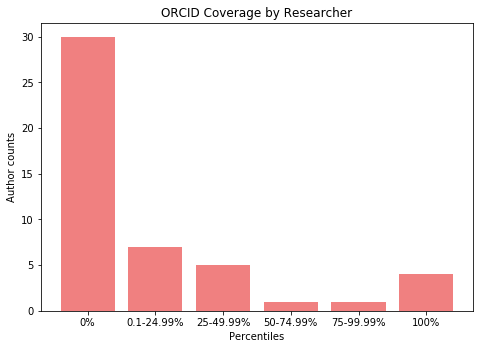

In [181]:
zero = 0
one_to_twenty_four = 0
twenty_five_to_forty_nine = 0
fifty_to_seventy_four = 0
seventy_five_to_ninety_nine = 0
one_hundred = 0
for i in percent_of_coverage:
    if i == 0:
        zero += 1
    elif i > 0 and i <= 24:
        one_to_twenty_four += 1
    elif i > 24 and i <= 49:
        twenty_five_to_forty_nine += 1
    elif i > 49 and i <= 74:
        fifty_to_seventy_four += 1
    elif i > 74 and i <= 99:
        seventy_five_to_ninety_nine += 1
    elif i == 100:
        one_hundred += 1 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
percentages = ['0%', '0.1-24.99%', '25-49.99%', '50-74.99%', '75-99.99%', '100%']
coverage_counts = [zero, one_to_twenty_four, twenty_five_to_forty_nine, fifty_to_seventy_four, seventy_five_to_ninety_nine, one_hundred]
ax.bar(percentages, coverage_counts, color='lightcoral')
plt.title("ORCID Coverage by Researcher")
plt.xlabel('Percentiles')
plt.ylabel('Author counts')
plt.show()

50% of the researchers in this set have no ORCID coverage in Dimenions, while ~17% have full coverage and an additional ~12% are above 75% coverage. Why do half of the researchers have no coverage? Is this pattern based in user behavior or something completely beyond user behavior like internal development practices at Dimensions? Would it be worthwhile to send a short survey to these 60 researchers to ask a few questions about their ORCID usage? Should we reach out to Dimensions to share these results and ask for some insight into why some researchers are covered so well and others not at all? Let's look at the four innermost segments to see if coverage correlates to time.

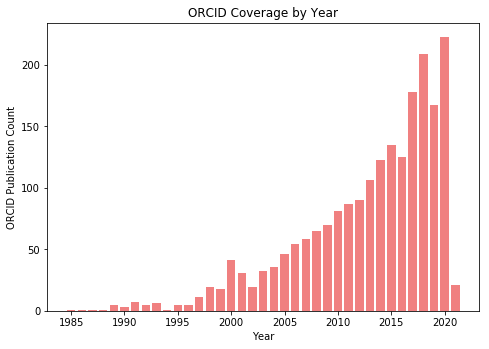

In [182]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = np.unique(orcid_pub_years)
pubs_per_year = []
for y in years:
    pubs_per_year.append(orcid_pub_years.count(y))
pubs_per_year
ax.bar(years, pubs_per_year, color='lightcoral')
plt.title("ORCID Coverage by Year")
plt.xlabel('Year')
plt.ylabel('ORCID Publication Count')
plt.show()

There is certainly an increase in the number of ORCID publications per year moving forward in time. This, alone, is not enough to demonstrate a correlation. We first need to make sure that this pattern is not caused simply by a general increase in publications per year or by the age of the researchers in our input data (a younger pool would yield fewer publications in earlier years).

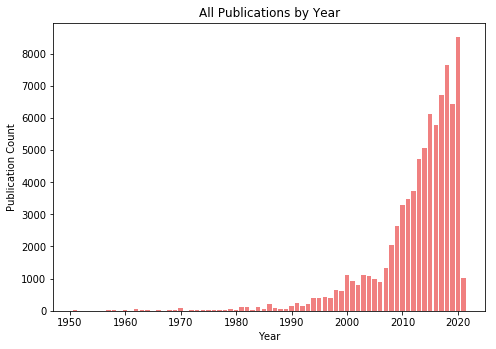

In [183]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = np.unique(all_pub_years)
pubs_per_year = []
for y in years:
    pubs_per_year.append(all_pub_years.count(y))
pubs_per_year
ax.bar(years, pubs_per_year, color='lightcoral')
plt.title("All Publications by Year")
plt.xlabel('Year')
plt.ylabel('Publication Count')
plt.show()

The histograms have a similar shape which indicates that there is likely not a correlation between ORCID coverage and time, except for the fact that the oldest ORCID publication was published in 1985. Perhaps, ORCID coverage in Dimensions starts in 1985? If this is true, then ORCID would not be useful for hirtorical reporting prior to 1985 but could be useful otherwise without concern for bias in publication date. This question can be posed to the Dimensions support team.

### 11. Searching by Dimensions researcher ID only (strategy 4): Results 

For the final strategy we can just plot a Venn diagram comparing what was returned from strategy 4 to that of all other strategies.

Researcher id alone: 4942
Other (Name string & GRID, Research id & GRID, or ORCID): 3171
Total: 5572


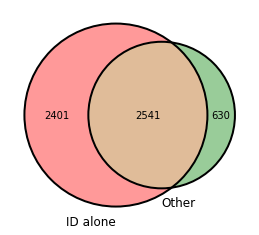

In [184]:
test = som_dataset[(som_dataset['search_strategy'] == 'Researcher id')]
other = som_dataset[(som_dataset['search_strategy'] != 'Researcher id')]

plot_venn(test['dimensions_id'], other['dimensions_id'], 'Researcher id alone', 'Other (Name string & GRID, Research id & GRID, or ORCID)', 'ID alone')

### 12. Comparing Profiles to Dimensions

One question we are interested in tracking over time is the viability of replacing our Web of Science (WoS) subscription with Dimensions so that we do not need to subscribe to both. Profiles currently harvests from WoS and PubMed, but also allows for account holders to manually identify their publications via a PubMed id or DOI. Dimensions includes the entire PubMed database. Because it is unclear how many publications were entered manually, a direct comparision favors Profiles. Harvesting directly from WoS would be preferable. However, a quick comparison could still be useful. Search strategy 4 will be excluded since name only searches were not conducted in Profiles.

In [185]:
dimensions_dataset = pd.read_csv('output/dimensions_report_som_gi.csv',delimiter=',')
dimensions_dataset = dimensions_dataset[(dimensions_dataset['search_strategy'] != 'Researcher id')]
profiles_no_orcid_dataset = pd.read_csv('output/profiles_report_som_gi.csv',delimiter=',')
profiles_orcid_dataset = pd.read_csv('output/profiles_report_with_orcid_som_gi.csv',delimiter=',')
# Remove columns not in both datasets
profiles_orcid_dataset = profiles_orcid_dataset.drop(['orcid', 'publication_status'], axis=1)
# Merge Profiles datasets
profiles_dataset = pd.concat([profiles_no_orcid_dataset, profiles_orcid_dataset])
profiles_dataset_no_dupes = profiles_dataset.drop_duplicates(subset=["wos_uid", "profiles_author_sunet"], keep='first', inplace=False)
print('Dimensions returned {} publications using search strategies 1-3.'.format(dimensions_dataset.shape[0]))
print('Profiles returned {} publications, once duplicates are removed.'.format(profiles_dataset_no_dupes.shape[0]))

Dimensions returned 3753 publications using search strategies 1-3.
Profiles returned 2460 publications, once duplicates are removed.


The difference in the number of publications is significant and moving in an unanticipated direction; one would expect Profiles to return more publications given that it has manually entered data. A point should be made about the de-duplication process. For Dimensions, publications were treated as duplicates if they have the same 'dimensions_id' and same researcher 'display_name' (a unique field for each researcher within this set of researchers); we rely completely on Dimensions to handle de-duplication without insight into how they achieve it. For Profiles publications are considered duplicates if they have the same 'wos_uid' and ''profiles_author_sunet'; we rely completely on WoS to handle de-duplication without insight into how they achieve it. Several interpretations are possible: 
- Dimensions has better coverage than WoS within the set of researchers included in this study
- or, Web of Science is much better at de-duplication; many of the records in the Dimensions set are actually duplicates that Dimensions failed to reckognize
- Some combination of the above is the cause of the discrepency
- There was an uncaught error in the harvest or analysis process

How do the two systems compare to ORCID coverage?

In [186]:
dimensions_orcid_pubs = dimensions_dataset[(dimensions_dataset['search_strategy'] == 'ORCID')]
print('Dimensions returned {} ORCID tagged publications.'.format(dimensions_orcid_pubs.shape[0]))
print('Profiles returned {} ORCID tagged publications.'.format(profiles_orcid_dataset.shape[0]))

Dimensions returned 2086 ORCID tagged publications.
Profiles returned 1094 ORCID tagged publications.


Dimensions seems to have better ORCID coverage than Profiles within this set of researchers. Can we use the DOIs from each report to see how they overlap?

Dimensions: 2278
Profiles: 947
Total: 2474


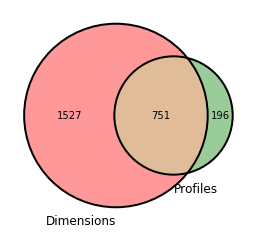

In [187]:
plot_venn(dimensions_dataset['doi'], profiles_orcid_dataset['doi'], 'Dimensions', 'Profiles', 'Dimensions', 'Profiles')

Dimensions again seems to have better coverage. ~61% of Dimensions publications have a DOI compared to ~39% of Profiles publications. The 1,527 DOIs in Dimensions that don't appear in Profiles could be either publications that Profiles has without a DOI listed or, perhaps, they are publicaitons that don't appear in Profiles. 

### 13. Summary

The following points seem clear:
- Combining multiple search strategies is better than any one strategy alone. 
- Strategies 2 and 4 are mutually exclusive; the results of 2 will always be contained in 4. Which strategy is preferable depends on the willingness of the stakeholder to do manual cleaning of the results. Do they want a highly precise report with some missing publications or is a potentially high number of false positives acceptable? Of course, uncommon names will have fewer false positives. Some researchers may not even notice the additional noise and may welcome strategy 4. Others may find that the majority of the results are false positives. In reality strategy 4 is probably not a viable option for all cases; it probably couldn't be implemented in Profiles, for example. But some departments may want to use this strategy for internal reports.
- ORCID is highly useful as an additive search strategy but cannot stand alone as the sole strategy. 
- There is some correlation between ORCID coverage and individual researchers; some researchers have full coverage (even with 500+ publications, while others have no coverage).
- ORCID search should probably be added to the SUL-Pub harvesting code if its not part of the search strategy already, whether we continue to harvest from Web of Science subscription or shift to Dimensions. 

The following need further investigation:
- Is the lapse in ORCID coverage attributable to researcher behavior? If so can we identify the desirable behaviors and educate departments that are requesting reports?
- Is the lapse in ORCID coverage attributable to Dimensions development decisions? Can we follow up with Dimensions support to learn more?
- Is the lapse in ORCID coverage for pre 1985 publications coincidental or did Dimensions choose a start date for ORCID coverage in the 1980s?
- Does ORCID coverage correlate to subject or field? We need to gather similar data from other departments to answer this.
- Does Dimensions have better coverage than Web of Science? We need to do direct searches in Web of Science using the same methodologies to know. 